In [9]:
import os, io, wave, csv, json, re, glob
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fftpack import dct
import matplotlib.cm as cm
import matplotlib as mpl
import collections
import seaborn as sns

from sklearn.externals import joblib

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

In [10]:
def generateBalancedData(X_more, y_more, size):
    """
    X_more = de input data
    y_more = de label data
    size = de maximum grootte die je wenst bijv. 300000 data totaal
    """
    
    pos_list = [i for i, x in enumerate(y_more) if x == 1][:int(size/2)]
    neg_list = [i for i, x in enumerate(y_more) if x == 0][:int(size/2)]

    balancedDataX = np.concatenate(([X_more[pos] for pos in pos_list], [X_more[neg] for neg in neg_list]), axis=0)
    
    balancedDataY = np.concatenate(([y_more[pos] for pos in pos_list], [y_more[neg] for neg in neg_list]), axis=0)
        
    return [balancedDataX, balancedDataY]

In [11]:
csv_file_name = 'datasetboundary_distance_4ms_v1.csv'

In [12]:
# Map waar het csv bestand zit
data_corpus_path = '/datb/aphasia/languagedata/corpus/dataset/' + csv_file_name


# Inlezen CSV bestand
df_corpus_data = pd.read_csv(data_corpus_path, sep=',', skiprows=1,
                             names=['region', 'label', 'sample_rate', 'begin', 'end', 'audiopath'])


# Voor het weghalen van 'nan' rows in de column "region"
df_corpus = df_corpus_data.dropna(subset=['region'])

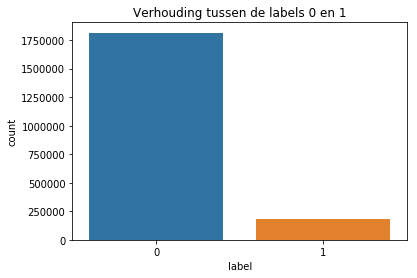

In [13]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='label', data=df_corpus)
plt.title("Verhouding tussen de labels 0 en 1")
plt.show()

In [14]:
# Get input data
X = []

for x in df_corpus.region:
    trans = [float(y) for y in x.split('|')]
    X.append(trans)

# Get labels
y = [int(x) for x in df_corpus.label]

print('Before generating more 1 labels data')
print('X:{}'.format(len(X)))
print('y:{}'.format(len(y)))

Before generating more 1 labels data
X:1996214
y:1996214


In [15]:
dataSize = 300000

In [16]:
X_more, y_more = generateBalancedData(X, y, dataSize)

print('After generating more 1 labels data')
print('X:{}'.format(len(X_more)))
print('y:{}'.format(len(y_more)))

After generating more 1 labels data
X:300000
y:300000


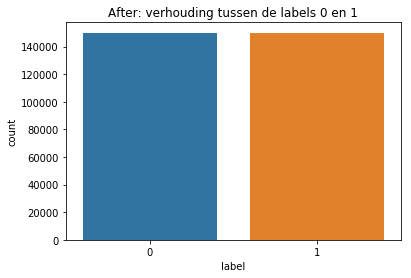

In [17]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='label', data=pd.DataFrame({'label':y_more}))
plt.title("After: verhouding tussen de labels 0 en 1")
plt.show()

In [18]:
test_size = 0.20
random_state = 42

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_more, y_more, test_size=test_size, 
                                                    random_state=random_state, stratify=y_more)

In [48]:
# Parameters voor de Classifier

num_neurons = 100
activation = 'relu'
solver = 'adam'
learning_rate_init = 0.0001
random_state = 42
max_iteratie = 300
n_num = 100
n_snum = 75

hidden_layer_sizes = (num_neurons, num_neurons, num_neurons) # <- (num_neurons, num_neurons) is bijv. 2 lagen

In [49]:
# init MLPClassifier
mlp = MLPClassifier(activation=activation, solver=solver, alpha=1e-5, learning_rate='adaptive',verbose=1,learning_rate_init=0.0001, 
                    hidden_layer_sizes=(n_num, n_num, n_num, n_num, n_num, n_snum, n_snum, n_snum,), random_state=random_state, max_iter=max_iteratie)

# Train MLPClassifier
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.69018685
Iteration 2, loss = 0.67833914
Iteration 3, loss = 0.66755165
Iteration 4, loss = 0.66021815
Iteration 5, loss = 0.65475552
Iteration 6, loss = 0.65037908
Iteration 7, loss = 0.64657545
Iteration 8, loss = 0.64342872
Iteration 9, loss = 0.64034329
Iteration 10, loss = 0.63761274
Iteration 11, loss = 0.63470803
Iteration 12, loss = 0.63181280
Iteration 13, loss = 0.62935090
Iteration 14, loss = 0.62649694
Iteration 15, loss = 0.62387323
Iteration 16, loss = 0.62122529
Iteration 17, loss = 0.61866983
Iteration 18, loss = 0.61607186
Iteration 19, loss = 0.61344346
Iteration 20, loss = 0.61086281
Iteration 21, loss = 0.60853201
Iteration 22, loss = 0.60613223
Iteration 23, loss = 0.60363410
Iteration 24, loss = 0.60117948
Iteration 25, loss = 0.59878158
Iteration 26, loss = 0.59597562
Iteration 27, loss = 0.59339200
Iteration 28, loss = 0.59147584
Iteration 29, loss = 0.58871127
Iteration 30, loss = 0.58638734
Iteration 31, loss = 0.58380282
Iteration 32, los

Iteration 253, loss = 0.37976049
Iteration 254, loss = 0.37863470
Iteration 255, loss = 0.38151983
Iteration 256, loss = 0.37897594
Iteration 257, loss = 0.37918139
Iteration 258, loss = 0.37861726
Iteration 259, loss = 0.38054893
Iteration 260, loss = 0.37817136
Iteration 261, loss = 0.37651079
Iteration 262, loss = 0.37953627
Iteration 263, loss = 0.37573722
Iteration 264, loss = 0.37732874
Iteration 265, loss = 0.37625474
Iteration 266, loss = 0.37679015
Iteration 267, loss = 0.37548839
Iteration 268, loss = 0.37632756
Iteration 269, loss = 0.37380027
Iteration 270, loss = 0.37339973
Iteration 271, loss = 0.37430231
Iteration 272, loss = 0.37407304
Iteration 273, loss = 0.37272329
Iteration 274, loss = 0.37339076
Iteration 275, loss = 0.37224008
Iteration 276, loss = 0.37467788
Iteration 277, loss = 0.37349687
Iteration 278, loss = 0.37115558
Iteration 279, loss = 0.37196804
Iteration 280, loss = 0.37253488
Iteration 281, loss = 0.37186896
Iteration 282, loss = 0.36967043
Iteration 

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 75, 75, 75),
       learning_rate='adaptive', learning_rate_init=0.0001, max_iter=300,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=42, shuffle=True, solver='adam',
       tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [50]:
predictions = mlp.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.63      0.58     30000
           1       0.56      0.48      0.52     30000

   micro avg       0.55      0.55      0.55     60000
   macro avg       0.55      0.55      0.55     60000
weighted avg       0.55      0.55      0.55     60000



In [51]:
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)
print('Train_score:{}'.format(train_score))
print('Test_score:{}'.format(test_score))

Train_score:0.8250666666666666
Test_score:0.5528166666666666


In [52]:
# file name
filename = 'mlp_model_test_H7_la_small_scikit_n120_h3_l00001_i4000.sav'

# In map
folder = '/datb/aphasia/languagedata/corpus/result/'

In [54]:
# save the model to disk
joblib.dump(mlp, folder+filename)

['/datb/aphasia/languagedata/corpus/result/mlp_model_test_H7_la_small_scikit_n120_h3_l00001_i4000.sav']

In [53]:
# load the model from disk
loaded_model = joblib.load(open(folder+filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Test_score:{}'.format(test_score))

FileNotFoundError: [Errno 2] No such file or directory: '/datb/aphasia/languagedata/corpus/result/mlp_model_test_H7_la_small_scikit_n120_h3_l00001_i4000.sav'